In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import f1_score

num_genes = 53

## 1,281 genes (core iCD signature) that were differentially expressed (fold change ≥ 1.5) between 2 independent iCD and Ctl groups.

In [2]:
core = pd.read_csv('data/core_icd.csv')
core.rename(columns={'Gene ID':'Gene_ID'}, inplace=True)
# core = core[core['Gene_ID'].apply(lambda x: str(x).isdigit())]
# core = core[core.Gene_ID.astype(int).isin(dataset.Gene_ID.astype(int))]
# core = core[core['Gene_ID'].apply(lambda x: isinstance(x, int))]
core

,Gene_ID,Gene Symbol,iCD-1 vs Ctl Fold change >= 1.5,Log FC (iCD-1 vs Ctl),iCD-2 vs Ctl Fold change >= 1.5,Log FC (iCD-2 vs Ctl )
0,405753,DUOXA2,34.267,5.099,51.931,5.699
1,4314,MMP3,21.431,4.422,29.681,4.891
2,366,AQP9,21.243,4.409,32.809,5.036
3,3576,IL8,18.578,4.216,27.838,4.799
4,50506,DUOX2,15.849,3.986,19.216,4.264
...,...,...,...,...,...,...
1276,338094,FAM151A,-9.422,-3.236,-8.349,-3.062
1277,8029,CUBN,-9.435,-3.238,-6.882,-2.783
1278,64902,AGXT2,-10.177,-3.347,-6.692,-2.742
1279,9027,NAT8,-10.575,-3.403,-6.818,-2.769


In [3]:
core = core.sort_values(["Log FC (iCD-1 vs Ctl)"], ascending=False)
core.head(60)


,Gene_ID,Gene Symbol,iCD-1 vs Ctl Fold change >= 1.5,Log FC (iCD-1 vs Ctl),iCD-2 vs Ctl Fold change >= 1.5,Log FC (iCD-2 vs Ctl )
0,405753,DUOXA2,34.267,5.099,51.931,5.699
1,4314,MMP3,21.431,4.422,29.681,4.891
2,366,AQP9,21.243,4.409,32.809,5.036
3,3576,IL8,18.578,4.216,27.838,4.799
4,50506,DUOX2,15.849,3.986,19.216,4.264
5,5225,PGC,15.305,3.936,11.905,3.574
6,7130,TNFAIP6,14.449,3.853,11.673,3.545
7,6374,CXCL5,14.101,3.818,13.939,3.801
8,1116,CHI3L1,13.731,3.779,8.139,3.025
9,5008,OSM,13.279,3.731,16.396,4.035


In [4]:
icd1 = pd.concat([core.head(num_genes), core.tail(num_genes)])

icd1

,Gene_ID,Gene Symbol,iCD-1 vs Ctl Fold change >= 1.5,Log FC (iCD-1 vs Ctl),iCD-2 vs Ctl Fold change >= 1.5,Log FC (iCD-2 vs Ctl )
0,405753,DUOXA2,34.267,5.099,51.931,5.699
1,4314,MMP3,21.431,4.422,29.681,4.891
2,366,AQP9,21.243,4.409,32.809,5.036
3,3576,IL8,18.578,4.216,27.838,4.799
4,50506,DUOX2,15.849,3.986,19.216,4.264
...,...,...,...,...,...,...
1276,338094,FAM151A,-9.422,-3.236,-8.349,-3.062
1277,8029,CUBN,-9.435,-3.238,-6.882,-2.783
1278,64902,AGXT2,-10.177,-3.347,-6.692,-2.742
1279,9027,NAT8,-10.575,-3.403,-6.818,-2.769


In [5]:
core = core.sort_values(["Log FC (iCD-2 vs Ctl )"], ascending=False)
core

,Gene_ID,Gene Symbol,iCD-1 vs Ctl Fold change >= 1.5,Log FC (iCD-1 vs Ctl),iCD-2 vs Ctl Fold change >= 1.5,Log FC (iCD-2 vs Ctl )
0,405753,DUOXA2,34.267,5.099,51.931,5.699
2,366,AQP9,21.243,4.409,32.809,5.036
1,4314,MMP3,21.431,4.422,29.681,4.891
3,3576,IL8,18.578,4.216,27.838,4.799
10,3577,CXCR1,12.230,3.612,19.625,4.295
...,...,...,...,...,...,...
1273,1271,CNTFR,-8.546,-3.095,-6.979,-2.803
1266,169693,C9orf71,-6.858,-2.778,-7.636,-2.933
1272,2538,G6PC,-8.011,-3.002,-7.651,-2.936
1275,9153,SLC28A2,-9.219,-3.205,-8.322,-3.057


## 200 most differentially expressed genes between CD1, CD2 and control

In [6]:
icd2 = pd.concat([core.head(num_genes), core.tail(num_genes)])

icd2

,Gene_ID,Gene Symbol,iCD-1 vs Ctl Fold change >= 1.5,Log FC (iCD-1 vs Ctl),iCD-2 vs Ctl Fold change >= 1.5,Log FC (iCD-2 vs Ctl )
0,405753,DUOXA2,34.267,5.099,51.931,5.699
2,366,AQP9,21.243,4.409,32.809,5.036
1,4314,MMP3,21.431,4.422,29.681,4.891
3,3576,IL8,18.578,4.216,27.838,4.799
10,3577,CXCR1,12.230,3.612,19.625,4.295
...,...,...,...,...,...,...
1273,1271,CNTFR,-8.546,-3.095,-6.979,-2.803
1266,169693,C9orf71,-6.858,-2.778,-7.636,-2.933
1272,2538,G6PC,-8.011,-3.002,-7.651,-2.936
1275,9153,SLC28A2,-9.219,-3.205,-8.322,-3.057


In [7]:
hundred = pd.concat([icd1, icd2])
hundred.shape

(212, 6)

In [8]:
hundred.Gene_ID

0       405753
1         4314
2          366
3         3576
4        50506
         ...  
1273      1271
1266    169693
1272      2538
1275      9153
1276    338094
Name: Gene_ID, Length: 212, dtype: object

In [9]:
hundred.rename(columns={'Gene Symbol':'Gene_Symbol'}, inplace=True)
hundred

,Gene_ID,Gene_Symbol,iCD-1 vs Ctl Fold change >= 1.5,Log FC (iCD-1 vs Ctl),iCD-2 vs Ctl Fold change >= 1.5,Log FC (iCD-2 vs Ctl )
0,405753,DUOXA2,34.267,5.099,51.931,5.699
1,4314,MMP3,21.431,4.422,29.681,4.891
2,366,AQP9,21.243,4.409,32.809,5.036
3,3576,IL8,18.578,4.216,27.838,4.799
4,50506,DUOX2,15.849,3.986,19.216,4.264
...,...,...,...,...,...,...
1273,1271,CNTFR,-8.546,-3.095,-6.979,-2.803
1266,169693,C9orf71,-6.858,-2.778,-7.636,-2.933
1272,2538,G6PC,-8.011,-3.002,-7.651,-2.936
1275,9153,SLC28A2,-9.219,-3.205,-8.322,-3.057


## RISK dataset of control, CD no deep ulcer, CD deep ulcer, UC patients

In [10]:
dataset = pd.read_csv('data/risk.csv')
# gene_symbol = dataset.pop("Gene Symbol")
dataset.rename(columns={'Gene ID':'Gene_ID', 'Gene Symbol':'Gene_Symbol'}, inplace=True)
# gene_id = dataset.pop("Gene ID")
dataset

,Gene_ID,Gene_Symbol,CCFA_Risk_001,CCFA_Risk_002,CCFA_Risk_003,CCFA_Risk_004,CCFA_Risk_005,CCFA_Risk_006,CCFA_Risk_007,CCFA_Risk_008,...,CCFA_Risk_089,CCFA_Risk_090,CCFA_Risk_117,CCFA_Risk_118,CCFA_Risk_121,CCFA_Risk_180,CCFA_Risk_114,CCFA_Risk_139,CCFA_Risk_237,CCFA_Risk_257
0,1,A1BG,-0.53931,1.31210,-0.083781,-0.86227,0.74121,0.72868,0.79123,-0.44062,...,-1.20180,-0.208140,-0.221770,-1.67290,-0.002418,0.569290,0.81253,0.61751,0.150020,0.039876
1,2,A2M,0.79561,1.12940,0.602470,0.81323,0.80724,0.47415,0.38337,0.57451,...,-0.41766,0.233700,0.155220,-0.24888,-0.049269,-0.048866,-0.16492,1.06890,-0.224290,0.232120
2,3,A2MP1,-0.20249,-0.20249,-0.202490,-0.20249,-0.20249,0.10892,-0.20249,-0.20249,...,0.43514,1.932800,2.077500,-0.20249,0.184890,2.437500,-0.20249,1.47860,0.089707,-0.202490
3,9,NAT1,1.02630,-0.65959,1.291500,0.19540,-0.39078,1.09460,-0.21672,0.36204,...,0.16248,0.372190,-0.019795,0.19675,0.392790,0.112410,-0.34924,-0.30852,0.606460,0.173880
4,10,NAT2,0.24641,-7.72410,-0.542870,0.39032,-4.82710,-0.58034,-1.78130,-0.16412,...,0.69774,0.008138,0.013065,0.70364,-0.229340,-0.216230,0.41874,-2.34260,0.000504,-0.296990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36367,100653021,LOC100653021,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
36368,100653022,PP12719,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
36369,100653023,LOC100653023,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
36370,100653024,LOC100653024,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000


In [11]:
dataset.sort_values('Gene_Symbol')

,Gene_ID,Gene_Symbol,CCFA_Risk_001,CCFA_Risk_002,CCFA_Risk_003,CCFA_Risk_004,CCFA_Risk_005,CCFA_Risk_006,CCFA_Risk_007,CCFA_Risk_008,...,CCFA_Risk_089,CCFA_Risk_090,CCFA_Risk_117,CCFA_Risk_118,CCFA_Risk_121,CCFA_Risk_180,CCFA_Risk_114,CCFA_Risk_139,CCFA_Risk_237,CCFA_Risk_257
35558,100533182,1/2_SBSRNA4,-1.84700,-0.29867,-1.647200,-0.48506,0.148170,-1.342600,-0.15981,-0.59770,...,0.18565,0.113140,-0.635880,-0.42911,0.013477,-0.86869,0.025045,-0.486590,0.126380,-1.80860
21262,353008,3_8_1_3,-1.46790,-1.49320,-0.565830,1.24030,-1.636600,-1.926600,-2.38750,1.62510,...,0.89387,0.068202,-2.005000,0.39839,-2.387500,-0.41717,0.276840,-2.288300,-0.448920,-0.63496
21263,353009,3_8_1_4,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000
21264,353010,3_8_1_5,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000
11831,55016,42064,0.57983,1.12740,0.870450,-0.38460,1.989100,0.791070,1.25040,-0.35596,...,-0.86746,-0.293080,-0.051494,-1.30390,0.841630,1.05240,-1.768800,0.873410,0.094807,0.40714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9292,26009,ZZZ3,-0.19404,0.40600,-0.098714,0.51559,0.569950,0.029898,0.29743,0.10408,...,-0.10331,-0.111390,-0.089172,-0.13961,-0.010948,0.49369,-1.319300,-0.041259,-0.004015,-0.17904
19579,259265,bA255A11_4,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000
18004,150478,bA395L14_12,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000
20355,286453,dJ341D10_1,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000


In [12]:
# dataset_clean.sort_values('Gene_Symbol')

In [13]:
# postprocessed
dataset_clean = pd.read_csv('data/risk_data_cleaned.csv')
# gene_symbol = dataset.pop("Gene Symbol")
dataset_clean.rename(columns={'gene_name':'Gene_Symbol'}, inplace=True)
# gene_id = dataset.pop("Gene ID")
dataset_clean


,Gene_Symbol,CCFA_Risk_001,CCFA_Risk_002,CCFA_Risk_003,CCFA_Risk_004,CCFA_Risk_005,CCFA_Risk_006,CCFA_Risk_007,CCFA_Risk_008,CCFA_Risk_009,...,CCFA_Risk_244,CCFA_Risk_245,CCFA_Risk_246,CCFA_Risk_247,CCFA_Risk_248,CCFA_Risk_249,CCFA_Risk_250,CCFA_Risk_251,CCFA_Risk_252,CCFA_Risk_253
0,LOC100506145,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,DDX11L1,0.000000,0.015338,0.000000,0.013754,0.000000,0.016261,0.080938,0.016086,0.043369,...,0.001628,0.000000,0.001019,0.008059,0.000000,0.021876,0.012109,0.033918,0.000000,0.00000
2,DDX11L1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,WASH7P,2.336832,2.056603,2.836626,2.174813,1.696051,2.730285,3.354926,3.006871,3.080797,...,4.033125,3.650517,3.311391,4.207582,3.669361,4.051151,3.965843,3.510557,3.497057,3.57512
4,MIR1302-2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36367,IL9R,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
36368,WASIR1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
36369,WASH6P,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
36370,DDX11L16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


In [14]:
# dataset = dataset_clean.copy()

### Match patient IDs with symptoms

In [15]:
full_ids = np.array(dataset.columns)[2:]
len(full_ids)

322

In [16]:
# find order of patients in dataset
patient_ids = np.array([int(i[-3:].lstrip("0"))-1 for i in full_ids])
patient_ids

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,  11,  12,  14,  15,
        16,  19,  20,  21,  22,  23,  24,  26,  28,  29,  31,  36,  39,
        42,  44,  45,  46,  47,  48,  49,  50,  51,  52,  55,  56,  57,
        58,  59,  60,  61,  62,  65,  67,  68,  69,  70,  72,  73,  74,
        90,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 114, 115, 119, 131,
       132, 133, 134, 135, 136, 137, 139, 140, 141, 142, 144, 145, 146,
       147, 148, 149, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
       165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
       178, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192,
       193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205,
       206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218,
       219, 220, 221, 222, 223, 224, 226, 227, 228, 229, 230, 235, 251,
       252, 253, 254, 255, 257, 258, 259, 260, 261, 262, 263, 26

In [17]:


with open('sample_titles.txt') as f:
    lines = f.read()

patients = np.array(lines.split("\t"))
num_patients = len(patients)
print(num_patients, "patients")
patients

322 patients


array(['"CD Female with Macroscopic inflammation and No Deep Ulcer (CCFA_Risk_001)"',
       '"CD Male with Macroscopic inflammation and No Deep Ulcer (CCFA_Risk_002)"',
       '"CD Female with Macroscopic inflammation and No Deep Ulcer (CCFA_Risk_003)"',
       '"CD Male with Macroscopic inflammation and No Deep Ulcer (CCFA_Risk_004)"',
       '"CD Female with Macroscopic inflammation and No Deep Ulcer (CCFA_Risk_005)"',
       '"CD Female with Macroscopic inflammation and Deep Ulcer (CCFA_Risk_006)"',
       '"CD Male with Macroscopic inflammation and No Deep Ulcer (CCFA_Risk_007)"',
       '"CD Male with No Microscopic or Macroscopic inflammation and No Deep Ulcer (CCFA_Risk_008)"',
       '"CD Female with Macroscopic inflammation and No Deep Ulcer (CCFA_Risk_009)"',
       '"Not IBD Male (CCFA_Risk_010)"', '"Not IBD Male (CCFA_Risk_011)"',
       '"CD Female with Microscopic inflammation and No Deep Ulcer (CCFA_Risk_012)"',
       '"CD Male with Macroscopic inflammation and No Deep

In [18]:


def classify(x):
    if "Not IBD" in x: # control
#         print(x)
        return 0
    elif "CD " in x and "No Deep Ulcer " in x: # Crohn's Disease no deep ulcer
        return 1
    elif "CD " in x: # Crohn's Disease deep ulcer
#         print(x)
        return 2
    else:
#         print(x)
        return 3 # Ulcerative Collitis

vec = np.vectorize(classify)

disease_labels = vec(patients)[patient_ids]
disease_labels

array([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 2, 2, 1, 1, 2, 1,
       1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2,
       1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2,
       1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2,
       2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 1, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [19]:
UC = disease_labels == 3

CD_no_ulcer = disease_labels == 1 
CD_ulcer = disease_labels == 2
CD = CD_no_ulcer | CD_ulcer
control = disease_labels == 0


In [20]:
def get_label(disease_id):
    if disease_id == 0:
        return "_control"
    elif disease_id == 1:
        return "_CD_plain"
    elif disease_id == 2:
        return "_CD_deep_ulcer"
    else:
        return "_UC"

symptom_IDs = list((patient_ids+1).astype('str'))
    
for i in range(len(disease_labels)):
    d = disease_labels[i]
    label = get_label(d)
    symptom_IDs[i] += label
    
    
    
        

In [21]:


symptom_IDs = np.array(symptom_IDs).astype('str')
symptom_IDs

array(['1_CD_plain', '2_CD_plain', '3_CD_plain', '4_CD_plain',
       '5_CD_plain', '6_CD_deep_ulcer', '7_CD_plain', '8_CD_plain',
       '9_CD_plain', '12_CD_plain', '13_CD_plain', '15_CD_plain',
       '16_CD_plain', '17_CD_deep_ulcer', '20_control',
       '21_CD_deep_ulcer', '22_CD_deep_ulcer', '23_CD_deep_ulcer',
       '24_CD_plain', '25_CD_plain', '27_CD_deep_ulcer', '29_CD_plain',
       '30_CD_plain', '32_CD_plain', '37_CD_deep_ulcer', '40_CD_plain',
       '43_CD_plain', '45_CD_plain', '46_CD_deep_ulcer', '47_CD_plain',
       '48_CD_deep_ulcer', '49_CD_deep_ulcer', '50_CD_deep_ulcer',
       '51_CD_deep_ulcer', '52_CD_plain', '53_CD_plain', '56_CD_plain',
       '57_CD_plain', '58_CD_plain', '59_CD_deep_ulcer', '60_CD_plain',
       '61_CD_plain', '62_CD_deep_ulcer', '63_CD_deep_ulcer',
       '66_CD_plain', '68_CD_plain', '69_CD_deep_ulcer',
       '70_CD_deep_ulcer', '71_CD_plain', '73_CD_plain', '74_CD_plain',
       '75_CD_deep_ulcer', '91_CD_plain', '93_CD_deep_ulcer',


In [22]:
UC_cols = symptom_IDs[UC]
# UC_cols
CD_cols = symptom_IDs[CD]
control_cols = symptom_IDs[control]
control_cols

array(['20_control', '120_control', '10_control', '11_control',
       '14_control', '19_control', '28_control', '31_control',
       '33_control', '34_control', '35_control', '36_control',
       '38_control', '39_control', '41_control', '42_control',
       '44_control', '54_control', '55_control', '64_control',
       '65_control', '67_control', '72_control', '76_control',
       '77_control', '78_control', '79_control', '80_control',
       '81_control', '82_control', '83_control', '84_control',
       '85_control', '86_control', '87_control', '88_control',
       '89_control', '90_control', '117_control', '118_control',
       '121_control', '180_control'], dtype='<U17')

In [23]:
gene_cols = np.array(dataset.columns[:2])
new_headers = np.concatenate([gene_cols, symptom_IDs], axis=0)
dataset.columns = new_headers

In [24]:
dataset

,Gene_ID,Gene_Symbol,1_CD_plain,2_CD_plain,3_CD_plain,4_CD_plain,5_CD_plain,6_CD_deep_ulcer,7_CD_plain,8_CD_plain,...,89_control,90_control,117_control,118_control,121_control,180_control,114_UC,139_CD_deep_ulcer,237_CD_plain,257_CD_deep_ulcer
0,1,A1BG,-0.53931,1.31210,-0.083781,-0.86227,0.74121,0.72868,0.79123,-0.44062,...,-1.20180,-0.208140,-0.221770,-1.67290,-0.002418,0.569290,0.81253,0.61751,0.150020,0.039876
1,2,A2M,0.79561,1.12940,0.602470,0.81323,0.80724,0.47415,0.38337,0.57451,...,-0.41766,0.233700,0.155220,-0.24888,-0.049269,-0.048866,-0.16492,1.06890,-0.224290,0.232120
2,3,A2MP1,-0.20249,-0.20249,-0.202490,-0.20249,-0.20249,0.10892,-0.20249,-0.20249,...,0.43514,1.932800,2.077500,-0.20249,0.184890,2.437500,-0.20249,1.47860,0.089707,-0.202490
3,9,NAT1,1.02630,-0.65959,1.291500,0.19540,-0.39078,1.09460,-0.21672,0.36204,...,0.16248,0.372190,-0.019795,0.19675,0.392790,0.112410,-0.34924,-0.30852,0.606460,0.173880
4,10,NAT2,0.24641,-7.72410,-0.542870,0.39032,-4.82710,-0.58034,-1.78130,-0.16412,...,0.69774,0.008138,0.013065,0.70364,-0.229340,-0.216230,0.41874,-2.34260,0.000504,-0.296990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36367,100653021,LOC100653021,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
36368,100653022,PP12719,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
36369,100653023,LOC100653023,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
36370,100653024,LOC100653024,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000


# Crohn's disease analysis

In [25]:
CD_df = dataset.drop(UC_cols, axis=1)
CD_df

,Gene_ID,Gene_Symbol,1_CD_plain,2_CD_plain,3_CD_plain,4_CD_plain,5_CD_plain,6_CD_deep_ulcer,7_CD_plain,8_CD_plain,...,88_control,89_control,90_control,117_control,118_control,121_control,180_control,139_CD_deep_ulcer,237_CD_plain,257_CD_deep_ulcer
0,1,A1BG,-0.53931,1.31210,-0.083781,-0.86227,0.74121,0.72868,0.79123,-0.44062,...,-0.478240,-1.20180,-0.208140,-0.221770,-1.67290,-0.002418,0.569290,0.61751,0.150020,0.039876
1,2,A2M,0.79561,1.12940,0.602470,0.81323,0.80724,0.47415,0.38337,0.57451,...,-0.247400,-0.41766,0.233700,0.155220,-0.24888,-0.049269,-0.048866,1.06890,-0.224290,0.232120
2,3,A2MP1,-0.20249,-0.20249,-0.202490,-0.20249,-0.20249,0.10892,-0.20249,-0.20249,...,1.526900,0.43514,1.932800,2.077500,-0.20249,0.184890,2.437500,1.47860,0.089707,-0.202490
3,9,NAT1,1.02630,-0.65959,1.291500,0.19540,-0.39078,1.09460,-0.21672,0.36204,...,0.640220,0.16248,0.372190,-0.019795,0.19675,0.392790,0.112410,-0.30852,0.606460,0.173880
4,10,NAT2,0.24641,-7.72410,-0.542870,0.39032,-4.82710,-0.58034,-1.78130,-0.16412,...,0.039076,0.69774,0.008138,0.013065,0.70364,-0.229340,-0.216230,-2.34260,0.000504,-0.296990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36367,100653021,LOC100653021,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000
36368,100653022,PP12719,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000
36369,100653023,LOC100653023,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000
36370,100653024,LOC100653024,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000


In [26]:
# select_all = dataset[dataset.Gene_ID.astype(str).isin(hundred.Gene_ID.astype(str))]
# CD_df.Gene_Symbol.astype(str).isin(hundred.Gene_Symbol.astype(str)) & CD_df["1_CD_plain"] < 0

In [27]:
random_sample = CD_df.iloc[CD_df.sample(50).index,:]


In [28]:
# include genes known to be relevant
with open("data/ibd_genes.txt", "r") as fp:   # Unpickling
    full_text = fp.read()
ibd_genes = np.unique(np.asarray(full_text.split("\n")))
ibd_genes

array(['ATG16L1', 'CNR1', 'CRP', 'DLG5', 'FCRL3', 'FHIT', 'HLA_B',
       'HLA_DRB1', 'HLA_DRB5', 'IL10', 'IL10RA', 'IL10RB', 'IL12B',
       'IL23R', 'IRGM', 'JAK2', 'LRRK2', 'LTA', 'MIF', 'MUC2', 'NOD2',
       'PTPN2', 'PTPN21', 'PTPN22', 'REG1A', 'SLC22A4', 'SLC22A5',
       'STAT1', 'STAT3', 'TCF4', 'TCF7L2', 'TLR1', 'TLR2', 'TLR4', 'TLR6',
       'TNF', 'TNFAIP2', 'TNFAIP3', 'TNFRSF6B', 'TPMT', 'TYK2', 'ZNF365'],
      dtype='<U8')

In [29]:
CD_df[CD_df.Gene_Symbol.astype(str).isin(hundred.Gene_Symbol.astype(str))]

,Gene_ID,Gene_Symbol,1_CD_plain,2_CD_plain,3_CD_plain,4_CD_plain,5_CD_plain,6_CD_deep_ulcer,7_CD_plain,8_CD_plain,...,88_control,89_control,90_control,117_control,118_control,121_control,180_control,139_CD_deep_ulcer,237_CD_plain,257_CD_deep_ulcer
7,13,AADAC,-0.88125,-8.38590,-3.4765,0.47600,-6.8609,-3.7573,-4.7448,-0.044202,...,-1.031600,1.16230,0.199200,0.23903,1.36150,-0.934720,-0.24844,-5.2289,-0.680680,-1.4899
265,335,APOA1,-3.04650,-9.36170,-2.6363,0.93493,-6.4784,-5.8715,-9.4177,-0.653090,...,-0.569040,0.74486,0.200140,-0.15932,1.05160,-1.207500,-1.06850,-7.4559,0.396090,-2.9453
267,337,APOA4,-0.91813,-7.16960,-2.6486,0.19887,-7.4818,-3.0414,-7.5605,-0.947140,...,-0.829470,0.54624,0.532340,-0.29898,0.26538,-0.071699,-1.20620,-6.2972,0.225200,-1.9198
268,338,APOB,-1.31280,-7.41580,-2.5412,1.91080,-7.0656,-3.7296,-6.8377,0.335400,...,-0.000025,1.02530,0.417150,0.14618,1.01690,0.075990,-0.44267,-5.4805,-0.043606,-2.8993
274,345,APOC3,-1.27750,-8.08800,-2.1691,0.80647,-7.2296,-3.8673,-8.2542,-0.466340,...,-0.581970,0.59072,0.047763,-0.39229,0.53516,-0.996560,-1.30290,-7.3703,0.002768,-1.8916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22673,392364,LOC392364,-4.60430,-4.16710,-4.6911,0.63360,-4.6911,-4.3797,-4.6911,-0.401950,...,-0.999530,1.15100,0.293030,1.72490,1.98500,-0.360010,-0.56571,-4.6911,-0.919350,-1.7109
23362,405753,DUOXA2,6.06520,-0.17754,8.5398,-0.97933,5.7582,7.8676,5.7058,-0.494790,...,4.623900,-2.57850,2.569000,2.20970,-2.70160,4.060800,2.09670,6.7348,5.017400,5.6270
26578,727897,MUC5B,4.36010,-0.28701,7.4102,-3.67380,2.8865,4.2751,5.6345,6.284800,...,1.791100,-0.51578,0.198760,-2.06210,-1.23770,1.980700,-0.68562,6.3898,0.433130,3.0599
29414,100132417,FCGR1C,3.04420,4.80430,5.1800,-0.66500,4.7526,3.5402,4.4911,1.260100,...,1.836900,-0.53663,0.195540,-1.03770,-0.32420,1.371300,1.30430,5.3452,3.155300,3.6883


In [30]:
select_hundred = CD_df[CD_df.Gene_Symbol.astype(str).isin(hundred.Gene_Symbol.astype(str)) | CD_df.Gene_Symbol.astype(str).isin(ibd_genes)]
select_hundred.Gene_Symbol.values

array(['AADAC', 'APOA1', 'APOA4', 'APOB', 'APOC3', 'AQP9', 'C6',
       'CEACAM7', 'CHI3L1', 'ABCC2', 'CNR1', 'CNTFR', 'CRIP1', 'CRP',
       'CSF3', 'CYP3A7', 'CYP3A4', 'FABP6', 'FCGR1A', 'FCGR1B', 'FCGR3A',
       'FCGR3B', 'FCN1', 'FHIT', 'FOXD1', 'FMO1', 'FOLH1', 'FPR1', 'FPR2',
       'G6PC', 'CXCL3', 'GSTA1', 'GSTA2', 'GUCA2B', 'HLA_B', 'HLA_DRB1',
       'HLA_DRB5', 'HMGCS2', 'HSD11B1', 'IL1B', 'IL1RN', 'IL8', 'CXCR1',
       'CXCR2', 'IL10', 'IL10RA', 'IL10RB', 'IL12B', 'ITIH3', 'JAK2',
       'KCNJ15', 'LCN2', 'LCT', 'LTA', 'MEP1B', 'MIF', 'CXCL9', 'MMP1',
       'MMP3', 'MMP7', 'MMP10', 'MUC1', 'MUC2', 'OSM', 'PGC', 'PNLIPRP2',
       'PTPN2', 'REG1A', 'REG1P', 'S100A8', 'S100A9', 'S100A12', 'SAA1',
       'SAA2', 'CXCL11', 'CXCL5', 'SELE', 'SFRP5', 'SHBG', 'SLC5A4',
       'SLC6A4', 'SLC10A2', 'SLC11A1', 'SLC13A1', 'SLC22A4', 'SLC22A5',
       'STAT1', 'STAT3', 'TCF4', 'TCF7L2', 'TCN1', 'TLR1', 'TLR2', 'TLR4',
       'TM4SF4', 'TNF', 'TNFAIP2', 'TNFAIP3', 'TNFAIP6', 'TPMT', 

In [31]:

select_hundred = pd.concat([select_hundred, random_sample]).drop_duplicates()
select_hundred.pop("Gene_ID")
select_hundred = select_hundred.set_index("Gene_Symbol")
select_hundred
# select_hundred = select_hundred[:-1]

,1_CD_plain,2_CD_plain,3_CD_plain,4_CD_plain,5_CD_plain,6_CD_deep_ulcer,7_CD_plain,8_CD_plain,9_CD_plain,12_CD_plain,...,88_control,89_control,90_control,117_control,118_control,121_control,180_control,139_CD_deep_ulcer,237_CD_plain,257_CD_deep_ulcer
Gene_Symbol,,,,,,,,,,,,,,,,,,,,,
AADAC,-0.88125,-8.38590,-3.47650,0.47600,-6.86090,-3.757300,-4.74480,-0.044202,-2.50650,0.006241,...,-1.031600,1.162300,0.199200,0.239030,1.36150,-0.934720,-0.24844,-5.22890,-0.680680,-1.489900
APOA1,-3.04650,-9.36170,-2.63630,0.93493,-6.47840,-5.871500,-9.41770,-0.653090,-4.26860,-0.835050,...,-0.569040,0.744860,0.200140,-0.159320,1.05160,-1.207500,-1.06850,-7.45590,0.396090,-2.945300
APOA4,-0.91813,-7.16960,-2.64860,0.19887,-7.48180,-3.041400,-7.56050,-0.947140,-1.66230,-0.893450,...,-0.829470,0.546240,0.532340,-0.298980,0.26538,-0.071699,-1.20620,-6.29720,0.225200,-1.919800
APOB,-1.31280,-7.41580,-2.54120,1.91080,-7.06560,-3.729600,-6.83770,0.335400,-3.11090,-0.016976,...,-0.000025,1.025300,0.417150,0.146180,1.01690,0.075990,-0.44267,-5.48050,-0.043606,-2.899300
APOC3,-1.27750,-8.08800,-2.16910,0.80647,-7.22960,-3.867300,-8.25420,-0.466340,-1.60880,-0.302970,...,-0.581970,0.590720,0.047763,-0.392290,0.53516,-0.996560,-1.30290,-7.37030,0.002768,-1.891600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNRF2P1,0.75275,0.20553,0.21511,0.91831,-0.43523,0.820030,-0.15133,0.290470,-0.84519,-0.451320,...,0.230990,0.308780,-0.100750,0.744780,0.50605,0.533790,-0.27331,-0.18172,1.065300,0.071232
IGLV2_5,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000
C6orf106,0.20321,0.33046,0.27613,0.55509,0.41110,0.182290,-0.17804,0.050465,-0.19165,0.157230,...,-0.116330,-0.053497,0.014321,-0.050175,0.12581,0.013297,0.09752,-0.22471,-0.045124,0.016099


In [32]:

select_hundred.index.values

array(['AADAC', 'APOA1', 'APOA4', 'APOB', 'APOC3', 'AQP9', 'C6',
       'CEACAM7', 'CHI3L1', 'ABCC2', 'CNR1', 'CNTFR', 'CRIP1', 'CRP',
       'CSF3', 'CYP3A7', 'CYP3A4', 'FABP6', 'FCGR1A', 'FCGR1B', 'FCGR3A',
       'FCGR3B', 'FCN1', 'FHIT', 'FOXD1', 'FMO1', 'FOLH1', 'FPR1', 'FPR2',
       'G6PC', 'CXCL3', 'GSTA1', 'GSTA2', 'GUCA2B', 'HLA_B', 'HLA_DRB1',
       'HLA_DRB5', 'HMGCS2', 'HSD11B1', 'IL1B', 'IL1RN', 'IL8', 'CXCR1',
       'CXCR2', 'IL10', 'IL10RA', 'IL10RB', 'IL12B', 'ITIH3', 'JAK2',
       'KCNJ15', 'LCN2', 'LCT', 'LTA', 'MEP1B', 'MIF', 'CXCL9', 'MMP1',
       'MMP3', 'MMP7', 'MMP10', 'MUC1', 'MUC2', 'OSM', 'PGC', 'PNLIPRP2',
       'PTPN2', 'REG1A', 'REG1P', 'S100A8', 'S100A9', 'S100A12', 'SAA1',
       'SAA2', 'CXCL11', 'CXCL5', 'SELE', 'SFRP5', 'SHBG', 'SLC5A4',
       'SLC6A4', 'SLC10A2', 'SLC11A1', 'SLC13A1', 'SLC22A4', 'SLC22A5',
       'STAT1', 'STAT3', 'TCF4', 'TCF7L2', 'TCN1', 'TLR1', 'TLR2', 'TLR4',
       'TM4SF4', 'TNF', 'TNFAIP2', 'TNFAIP3', 'TNFAIP6', 'TPMT', 

## Final sample of 220 genes
### 128 matches with RISK dataset, plus 42 other genes known to be relevant, plus random sample of 50

In [33]:
select_hundred

,1_CD_plain,2_CD_plain,3_CD_plain,4_CD_plain,5_CD_plain,6_CD_deep_ulcer,7_CD_plain,8_CD_plain,9_CD_plain,12_CD_plain,...,88_control,89_control,90_control,117_control,118_control,121_control,180_control,139_CD_deep_ulcer,237_CD_plain,257_CD_deep_ulcer
Gene_Symbol,,,,,,,,,,,,,,,,,,,,,
AADAC,-0.88125,-8.38590,-3.47650,0.47600,-6.86090,-3.757300,-4.74480,-0.044202,-2.50650,0.006241,...,-1.031600,1.162300,0.199200,0.239030,1.36150,-0.934720,-0.24844,-5.22890,-0.680680,-1.489900
APOA1,-3.04650,-9.36170,-2.63630,0.93493,-6.47840,-5.871500,-9.41770,-0.653090,-4.26860,-0.835050,...,-0.569040,0.744860,0.200140,-0.159320,1.05160,-1.207500,-1.06850,-7.45590,0.396090,-2.945300
APOA4,-0.91813,-7.16960,-2.64860,0.19887,-7.48180,-3.041400,-7.56050,-0.947140,-1.66230,-0.893450,...,-0.829470,0.546240,0.532340,-0.298980,0.26538,-0.071699,-1.20620,-6.29720,0.225200,-1.919800
APOB,-1.31280,-7.41580,-2.54120,1.91080,-7.06560,-3.729600,-6.83770,0.335400,-3.11090,-0.016976,...,-0.000025,1.025300,0.417150,0.146180,1.01690,0.075990,-0.44267,-5.48050,-0.043606,-2.899300
APOC3,-1.27750,-8.08800,-2.16910,0.80647,-7.22960,-3.867300,-8.25420,-0.466340,-1.60880,-0.302970,...,-0.581970,0.590720,0.047763,-0.392290,0.53516,-0.996560,-1.30290,-7.37030,0.002768,-1.891600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNRF2P1,0.75275,0.20553,0.21511,0.91831,-0.43523,0.820030,-0.15133,0.290470,-0.84519,-0.451320,...,0.230990,0.308780,-0.100750,0.744780,0.50605,0.533790,-0.27331,-0.18172,1.065300,0.071232
IGLV2_5,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000
C6orf106,0.20321,0.33046,0.27613,0.55509,0.41110,0.182290,-0.17804,0.050465,-0.19165,0.157230,...,-0.116330,-0.053497,0.014321,-0.050175,0.12581,0.013297,0.09752,-0.22471,-0.045124,0.016099


## Patient statistics

In [34]:
select_hundred.describe() 

,1_CD_plain,2_CD_plain,3_CD_plain,4_CD_plain,5_CD_plain,6_CD_deep_ulcer,7_CD_plain,8_CD_plain,9_CD_plain,12_CD_plain,...,88_control,89_control,90_control,117_control,118_control,121_control,180_control,139_CD_deep_ulcer,237_CD_plain,257_CD_deep_ulcer
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.114182,-0.371417,0.633442,-0.205966,-0.032756,0.169498,-0.531864,-0.104626,0.256670,0.283329,...,0.455250,-0.254880,0.239739,0.062237,-0.278198,0.455455,0.031185,0.265099,0.594298,0.778354
std,2.943196,5.344656,3.973033,1.408297,4.815815,3.598563,3.898517,1.330200,3.234821,1.214053,...,1.427437,1.091564,0.798107,0.735402,1.235448,1.430739,1.024012,4.736898,2.059091,3.231045
min,-9.143700,-9.758000,-6.531400,-9.230500,-9.148200,-7.632200,-9.509100,-8.240300,-7.708600,-5.277600,...,-2.434800,-3.993500,-2.389000,-3.229700,-4.333800,-3.963600,-2.917300,-7.702300,-5.738000,-5.094500
25%,-1.575650,-4.662050,-2.673375,-0.584067,-4.688850,-3.021300,-4.241725,-0.468472,-2.393025,-0.184245,...,-0.401452,-0.752097,-0.144937,-0.187387,-0.934087,-0.382147,-0.641642,-4.285800,-0.513737,-1.810375
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017233,0.000000,0.000000,0.044304,...,0.048796,0.000000,0.068354,0.000000,0.000000,0.059434,0.000000,0.000000,0.000000,0.000000
75%,2.150900,2.954875,4.897375,0.556392,3.101025,2.932875,2.503675,0.322732,2.748925,0.685318,...,1.230775,0.478290,0.541697,0.332028,0.603208,1.162675,0.694595,4.252925,1.681425,3.556850
max,7.623300,10.885300,8.701100,2.459100,10.076100,8.476300,6.956900,6.284800,10.346600,5.072600,...,4.889700,2.110600,2.898600,2.354200,2.125900,4.953400,3.361200,10.961900,7.013100,8.431700


## Gene statistics

In [35]:
gene_stats = select_hundred.T.describe()
gene_stats

Gene_Symbol,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,C1QTNF5,ZBTB8B,EEF1A1P16,SLX1A_SULT1A3,SF3A3P1,ZNRF2P1,IGLV2_5,C6orf106,RPL7AP54,LCE2A
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.0,260.000000,260.0,260.000000,260.0,260.000000,260.0,260.000000,260.0,260.000000
mean,-2.073628,-2.462062,-2.020175,-2.028195,-1.913645,4.358227,-2.521781,2.858556,2.848266,-1.878031,...,0.0,0.139106,0.0,-0.298510,0.0,-0.064339,0.0,-0.042231,0.0,0.277639
std,2.427516,3.069309,2.701487,2.565986,2.857577,3.007303,2.023445,3.331058,2.591624,1.902136,...,0.0,0.423478,0.0,0.690846,0.0,0.975160,0.0,0.228507,0.0,0.977268
min,-10.494900,-11.447600,-10.607400,-9.719700,-10.273700,-1.915000,-5.177400,-2.534700,-3.544400,-6.706600,...,0.0,0.000000,0.0,-2.662700,0.0,-4.342000,0.0,-0.857130,0.0,-0.384090
25%,-3.579975,-4.570450,-3.400950,-3.232300,-3.256525,2.102800,-4.002025,0.583035,0.985918,-3.344950,...,0.0,0.000000,0.0,-0.728813,0.0,-0.434188,0.0,-0.193727,0.0,-0.384090
50%,-1.478150,-1.614000,-1.227100,-1.224000,-1.289700,4.718850,-2.809050,2.421700,2.834600,-1.587400,...,0.0,0.000000,0.0,-0.323525,0.0,0.097135,0.0,-0.064273,0.0,-0.384090
75%,-0.245125,-0.165515,-0.125451,-0.136300,0.107045,6.450725,-1.280575,4.481425,4.604225,-0.405412,...,0.0,0.000000,0.0,0.146737,0.0,0.535005,0.0,0.091469,0.0,0.754798
max,2.245900,3.734600,2.430200,1.910800,3.344100,13.110300,4.510600,13.150200,8.169000,1.719800,...,0.0,2.539500,0.0,1.639600,0.0,3.573000,0.0,0.579720,0.0,3.961100


In [36]:
select_hundred.T

Gene_Symbol,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,C1QTNF5,ZBTB8B,EEF1A1P16,SLX1A_SULT1A3,SF3A3P1,ZNRF2P1,IGLV2_5,C6orf106,RPL7AP54,LCE2A
1_CD_plain,-0.88125,-3.04650,-0.918130,-1.312800,-1.277500,6.32150,-3.50560,5.42790,3.30580,-1.70320,...,0.0,0.000000,0.0,-1.293100,0.0,0.752750,0.0,0.203210,0.0,-0.29728
2_CD_plain,-8.38590,-9.36170,-7.169600,-7.415800,-8.088000,9.67970,-5.17740,-0.42569,8.04170,-5.07250,...,0.0,0.000000,0.0,-2.402600,0.0,0.205530,0.0,0.330460,0.0,-0.38409
3_CD_plain,-3.47650,-2.63630,-2.648600,-2.541200,-2.169100,7.92790,-4.07780,7.18170,5.55740,-4.25090,...,0.0,0.000000,0.0,-1.088200,0.0,0.215110,0.0,0.276130,0.0,-0.38409
4_CD_plain,0.47600,0.93493,0.198870,1.910800,0.806470,0.22229,-0.52026,-2.39740,-2.62100,0.84513,...,0.0,0.000000,0.0,-0.270780,0.0,0.918310,0.0,0.555090,0.0,1.75320
5_CD_plain,-6.86090,-6.47840,-7.481800,-7.065600,-7.229600,9.27050,-5.17740,0.88511,7.74180,-5.39240,...,0.0,0.000000,0.0,-2.662700,0.0,-0.435230,0.0,0.411100,0.0,-0.38409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121_control,-0.93472,-1.20750,-0.071699,0.075990,-0.996560,4.89670,1.88000,1.25710,-0.30353,0.07381,...,0.0,0.045057,0.0,-0.047652,0.0,0.533790,0.0,0.013297,0.0,-0.38409
180_control,-0.24844,-1.06850,-1.206200,-0.442670,-1.302900,0.72500,-2.27430,-2.21660,1.06760,-0.13725,...,0.0,0.000000,0.0,-0.666580,0.0,-0.273310,0.0,0.097520,0.0,0.93399
139_CD_deep_ulcer,-5.22890,-7.45590,-6.297200,-5.480500,-7.370300,9.03570,-3.91130,1.55580,7.39930,-4.61280,...,0.0,0.000000,0.0,-1.208500,0.0,-0.181720,0.0,-0.224710,0.0,-0.38409
237_CD_plain,-0.68068,0.39609,0.225200,-0.043606,0.002768,5.92230,-0.31168,2.62370,1.93600,-0.93539,...,0.0,0.000000,0.0,0.116260,0.0,1.065300,0.0,-0.045124,0.0,0.74461


In [37]:
select_hundred.T.loc[select_hundred.T.index.str.endswith('_CD_plain'),"AADAC"].values.shape

(142,)

In [38]:
select_hundred.T.loc[select_hundred.T.index.str.endswith('_CD_deep_ulcer'),"AADAC"].values.shape

(76,)

In [39]:
select_hundred.T.loc[select_hundred.T.index.str.endswith('_control'),"AADAC"].values.shape

(42,)

### Find top differentially expressed genes

### Welch's t-test at the 1% significance level

In [40]:
# all_genes = np.array(select_hundred.T.columns)
# len(all_genes)

In [41]:
import math
all_genes = list(select_hundred.index.values)

# top_genes = {}
fc = []
logp = []
most_sig = []
most_sig_fewer = []
most_sig_fewest = []
all_sig = []
for gene_symbol in all_genes:
#     print(gene_symbol)
    controls = select_hundred.T.loc[select_hundred.T.index.str.endswith('_control'), gene_symbol].values
    CD_plains = select_hundred.T.loc[select_hundred.T.index.str.endswith('_CD_plain'),gene_symbol].values
    CD_ulcers = select_hundred.T.loc[select_hundred.T.index.str.endswith('_CD_deep_ulcer'),gene_symbol].values

    CD = np.concatenate([CD_plains, CD_ulcers], axis=0)
    if len(CD.shape) > 1:
        CD = CD[:,0]
    if len(controls.shape) > 1:
        controls = controls[:,0]

    log2FC = np.mean(CD) - np.mean(controls) #already log2-transformed
    
    stat, p_val = stats.ttest_ind(CD, controls, equal_var=False)

    if not np.isnan(log2FC):


        fc.append(log2FC)
        lp = -math.log(p_val)
        logp.append(lp)
        if p_val < 0.01:
            all_sig.append(gene_symbol)
#             if lp < 15 or abs(log2FC) > 4:
#                 most_sig_fewest.append(gene_symbol)
            if lp < 6 or abs(log2FC) > 2.6:
                most_sig_fewest.append(gene_symbol)
            if lp < 10 or abs(log2FC) > 2.2:
                most_sig_fewer.append(gene_symbol)
            if lp < 10 or abs(log2FC) > 1.5:
                most_sig.append(gene_symbol)
#             print("lp:",lp)
#         else:
#             print(gene_symbol)


In [42]:
len(all_genes)

220

In [43]:
len(fc)

220

In [44]:
len(logp)

220

In [45]:
len(all_sig)

153

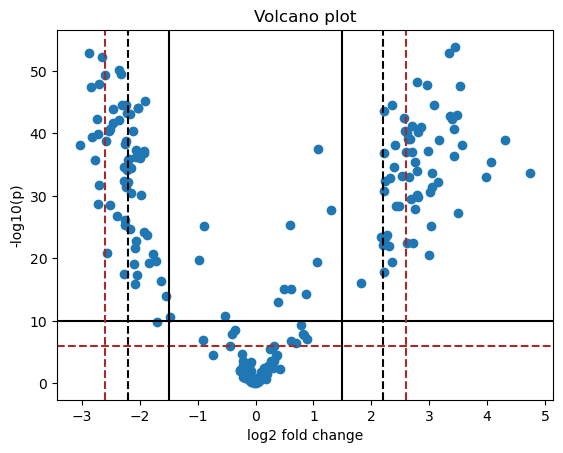

In [46]:
plt.figure()
plt.scatter(fc, logp)
plt.title("Volcano plot")
plt.axhline(y=10, c='k')
plt.axhline(y=6, c='brown', linestyle='--')

plt.axvline(x=1.5, c='k')
plt.axvline(x=-1.5, c='k')
plt.axvline(x=2.2, c='k', linestyle='--')
plt.axvline(x=-2.2, c='k', linestyle='--')
plt.axvline(x=2.6, c='brown', linestyle='--')
plt.axvline(x=-2.6, c='brown', linestyle='--')
plt.xlabel("log2 fold change")
plt.ylabel("-log10(p)")
plt.show()

In [47]:
smallest_set = np.asarray(most_sig_fewest)
smaller_set = np.asarray(most_sig_fewer)
most_sig_set = np.asarray(most_sig)
all_sig_set = np.asarray(all_sig)

In [48]:
all_sig_set.shape

(153,)

In [49]:
most_sig_set.shape

(141,)

In [50]:
smaller_set.shape

(111,)

In [51]:
smallest_set.shape

(57,)

In [52]:
# save selected genes
with open("data/most_sig_set", "wb") as fp:   #Pickling
    pickle.dump(most_sig_set, fp)

In [53]:
# save selected genes
with open("data/smaller_set", "wb") as fp:   #Pickling
    pickle.dump(smaller_set, fp)

In [54]:
# save selected genes
with open("data/smallest_set", "wb") as fp:   #Pickling
    pickle.dump(smallest_set, fp)

In [55]:
# save selected genes
with open("data/all_sig_set", "wb") as fp:   #Pickling
    pickle.dump(all_sig_set, fp)

## Hierarchical clustering heatmap 
### 119 most differentially expressed genes between CD and control patients - stat significant at 1% level
### Includes controls, CD no deep ulcer, CD deep ulcer

In [56]:
all_CD_cols = np.array(select_hundred.columns)
i = 0
for i in range(len(all_CD_cols)):
    print(i,":",all_CD_cols[i])

0 : 1_CD_plain
1 : 2_CD_plain
2 : 3_CD_plain
3 : 4_CD_plain
4 : 5_CD_plain
5 : 6_CD_deep_ulcer
6 : 7_CD_plain
7 : 8_CD_plain
8 : 9_CD_plain
9 : 12_CD_plain
10 : 13_CD_plain
11 : 15_CD_plain
12 : 16_CD_plain
13 : 17_CD_deep_ulcer
14 : 20_control
15 : 21_CD_deep_ulcer
16 : 22_CD_deep_ulcer
17 : 23_CD_deep_ulcer
18 : 24_CD_plain
19 : 25_CD_plain
20 : 27_CD_deep_ulcer
21 : 29_CD_plain
22 : 30_CD_plain
23 : 32_CD_plain
24 : 37_CD_deep_ulcer
25 : 40_CD_plain
26 : 43_CD_plain
27 : 45_CD_plain
28 : 46_CD_deep_ulcer
29 : 47_CD_plain
30 : 48_CD_deep_ulcer
31 : 49_CD_deep_ulcer
32 : 50_CD_deep_ulcer
33 : 51_CD_deep_ulcer
34 : 52_CD_plain
35 : 53_CD_plain
36 : 56_CD_plain
37 : 57_CD_plain
38 : 58_CD_plain
39 : 59_CD_deep_ulcer
40 : 60_CD_plain
41 : 61_CD_plain
42 : 62_CD_deep_ulcer
43 : 63_CD_deep_ulcer
44 : 66_CD_plain
45 : 68_CD_plain
46 : 69_CD_deep_ulcer
47 : 70_CD_deep_ulcer
48 : 71_CD_plain
49 : 73_CD_plain
50 : 74_CD_plain
51 : 75_CD_deep_ulcer
52 : 91_CD_plain
53 : 93_CD_deep_ulcer
54 : 94

In [57]:
sig_genes_df = select_hundred.copy()
sig_genes_df

,1_CD_plain,2_CD_plain,3_CD_plain,4_CD_plain,5_CD_plain,6_CD_deep_ulcer,7_CD_plain,8_CD_plain,9_CD_plain,12_CD_plain,...,88_control,89_control,90_control,117_control,118_control,121_control,180_control,139_CD_deep_ulcer,237_CD_plain,257_CD_deep_ulcer
Gene_Symbol,,,,,,,,,,,,,,,,,,,,,
AADAC,-0.88125,-8.38590,-3.47650,0.47600,-6.86090,-3.757300,-4.74480,-0.044202,-2.50650,0.006241,...,-1.031600,1.162300,0.199200,0.239030,1.36150,-0.934720,-0.24844,-5.22890,-0.680680,-1.489900
APOA1,-3.04650,-9.36170,-2.63630,0.93493,-6.47840,-5.871500,-9.41770,-0.653090,-4.26860,-0.835050,...,-0.569040,0.744860,0.200140,-0.159320,1.05160,-1.207500,-1.06850,-7.45590,0.396090,-2.945300
APOA4,-0.91813,-7.16960,-2.64860,0.19887,-7.48180,-3.041400,-7.56050,-0.947140,-1.66230,-0.893450,...,-0.829470,0.546240,0.532340,-0.298980,0.26538,-0.071699,-1.20620,-6.29720,0.225200,-1.919800
APOB,-1.31280,-7.41580,-2.54120,1.91080,-7.06560,-3.729600,-6.83770,0.335400,-3.11090,-0.016976,...,-0.000025,1.025300,0.417150,0.146180,1.01690,0.075990,-0.44267,-5.48050,-0.043606,-2.899300
APOC3,-1.27750,-8.08800,-2.16910,0.80647,-7.22960,-3.867300,-8.25420,-0.466340,-1.60880,-0.302970,...,-0.581970,0.590720,0.047763,-0.392290,0.53516,-0.996560,-1.30290,-7.37030,0.002768,-1.891600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNRF2P1,0.75275,0.20553,0.21511,0.91831,-0.43523,0.820030,-0.15133,0.290470,-0.84519,-0.451320,...,0.230990,0.308780,-0.100750,0.744780,0.50605,0.533790,-0.27331,-0.18172,1.065300,0.071232
IGLV2_5,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000
C6orf106,0.20321,0.33046,0.27613,0.55509,0.41110,0.182290,-0.17804,0.050465,-0.19165,0.157230,...,-0.116330,-0.053497,0.014321,-0.050175,0.12581,0.013297,0.09752,-0.22471,-0.045124,0.016099


C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


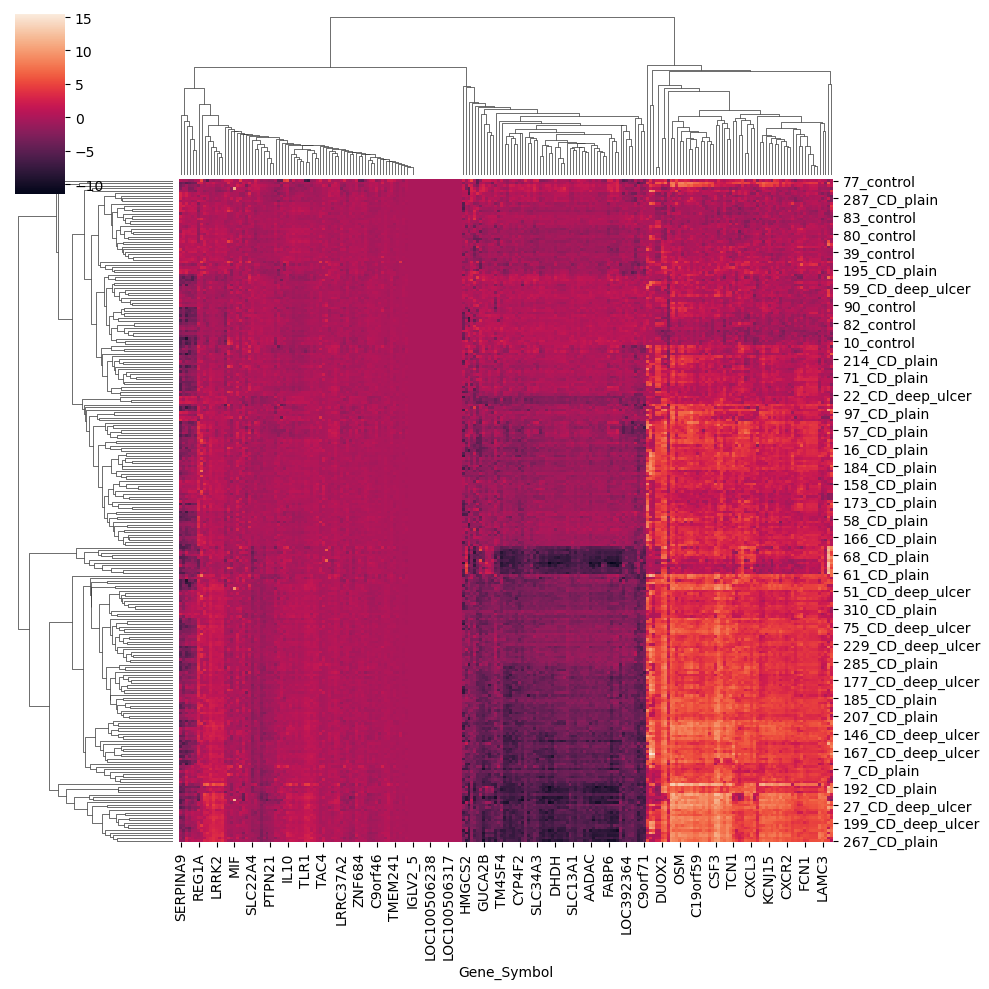

In [58]:
# sns.clustermap(top_genes.T)
# sns.clustermap(top_genes.iloc[:,np.r_[143:168, 221:228]].T)
sns.clustermap(sig_genes_df.T)
# sns.clustermap(select_hundred.iloc[:20,np.r_[143:168, 221:228]].T)

In [59]:
sig_genes_df.isnull().values.any()

False

In [60]:
sig_genes_df.to_csv('data/cd_df.csv')

### Top X most differentially expressed genes between CD and control patients

In [61]:
top_genes_df = select_hundred.loc[smallest_set]
top_genes_df

,1_CD_plain,2_CD_plain,3_CD_plain,4_CD_plain,5_CD_plain,6_CD_deep_ulcer,7_CD_plain,8_CD_plain,9_CD_plain,12_CD_plain,...,88_control,89_control,90_control,117_control,118_control,121_control,180_control,139_CD_deep_ulcer,237_CD_plain,257_CD_deep_ulcer
Gene_Symbol,,,,,,,,,,,,,,,,,,,,,
APOA1,-3.046500,-9.36170,-2.63630,0.934930,-6.47840,-5.87150,-9.41770,-0.653090,-4.26860,-0.835050,...,-0.56904,0.744860,0.200140,-0.159320,1.051600,-1.207500,-1.068500,-7.45590,0.396090,-2.94530
AQP9,6.321500,9.67970,7.92790,0.222290,9.27050,7.43260,5.41190,0.882510,5.87860,2.118000,...,3.40760,-1.915000,2.679800,1.418900,-1.915000,4.896700,0.725000,9.03570,5.922300,7.62510
C6,-3.505600,-5.17740,-4.07780,-0.520260,-5.17740,-3.86590,-4.20280,-1.602200,-5.17740,-3.144300,...,0.04943,0.704030,2.657300,0.328110,-1.710900,1.880000,-2.274300,-3.91130,-0.311680,-3.30480
CEACAM7,5.427900,-0.42569,7.18170,-2.397400,0.88511,5.01990,3.83070,0.914890,2.74530,-0.823620,...,1.39560,-0.897070,0.922570,0.301730,0.401220,1.257100,-2.216600,1.55580,2.623700,3.64970
CHI3L1,3.305800,8.04170,5.55740,-2.621000,7.74180,3.38880,6.20020,1.108200,3.80490,2.709200,...,1.13230,-2.661200,-0.535460,-0.651740,-2.108600,-0.303530,1.067600,7.39930,1.936000,6.41240
CNTFR,-3.052600,-7.91970,-4.01280,0.148220,-7.60760,-4.43830,-7.91970,-0.511510,-5.01220,-0.646370,...,-2.43480,1.334700,0.126700,0.324420,0.144790,-2.127900,-1.334800,-5.91660,-3.090500,-4.14020
CSF3,0.000000,9.47620,6.51370,0.137290,8.74400,1.31140,5.92270,0.000000,4.18760,0.000000,...,2.25230,0.000000,0.550380,0.000000,0.000000,0.000000,0.000000,9.07140,1.543700,8.01400
CYP3A4,-3.879200,-9.60300,-2.88130,0.733760,-6.98370,-3.32100,-7.70960,-0.532380,-3.59700,-0.411650,...,0.39981,0.371250,0.115900,-0.007023,0.955210,0.334690,-1.046500,-6.73860,-0.937210,-2.14040
FCGR1A,2.961200,5.01790,5.15060,-0.828660,4.77590,3.51350,4.50970,1.518200,3.79780,2.477700,...,1.79680,-1.550600,-0.120800,-1.078500,-0.893410,1.389700,1.279000,5.21380,3.141600,3.55260


C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


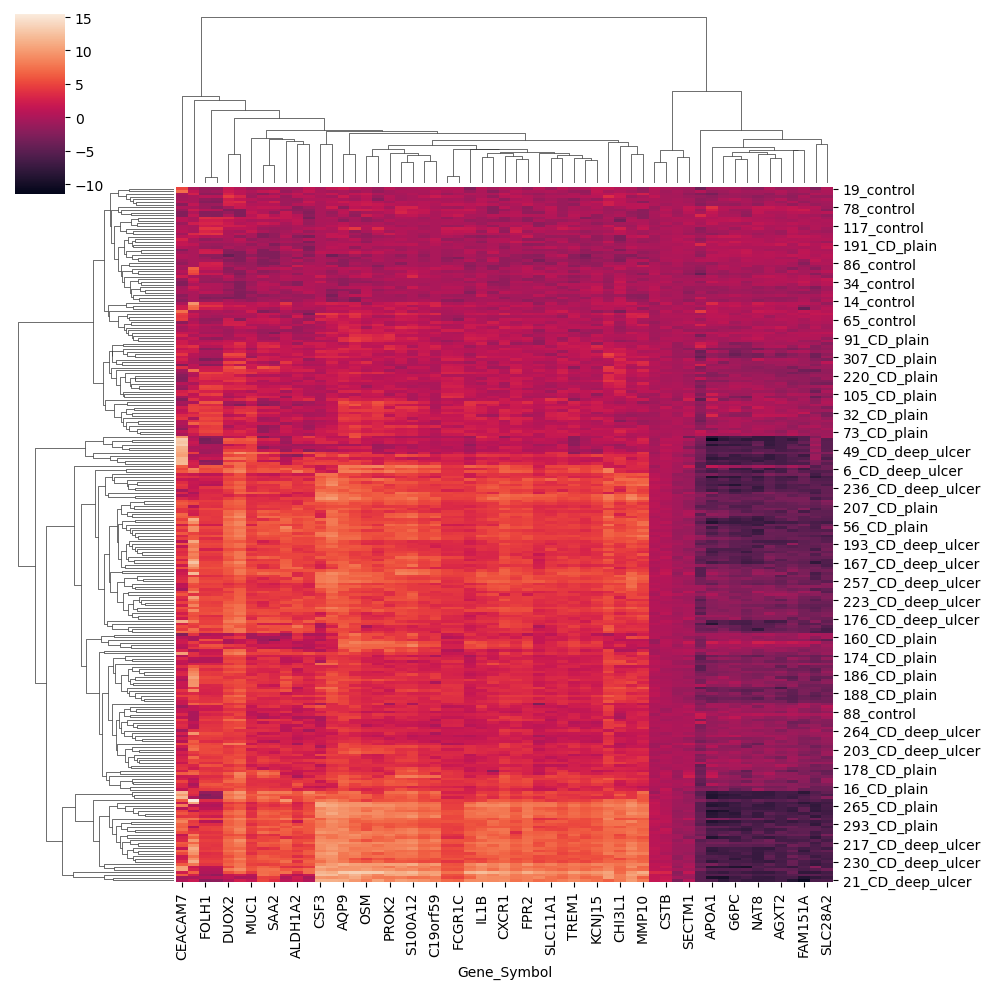

In [62]:
sns.clustermap(top_genes_df.T)

### Example: expression of top X genes in random sample of control and CD patients

In [63]:
# random sample of patients
np.random.seed(123)
rand_pids = np.random.randint(low=0, high=260, size=30, dtype=int)

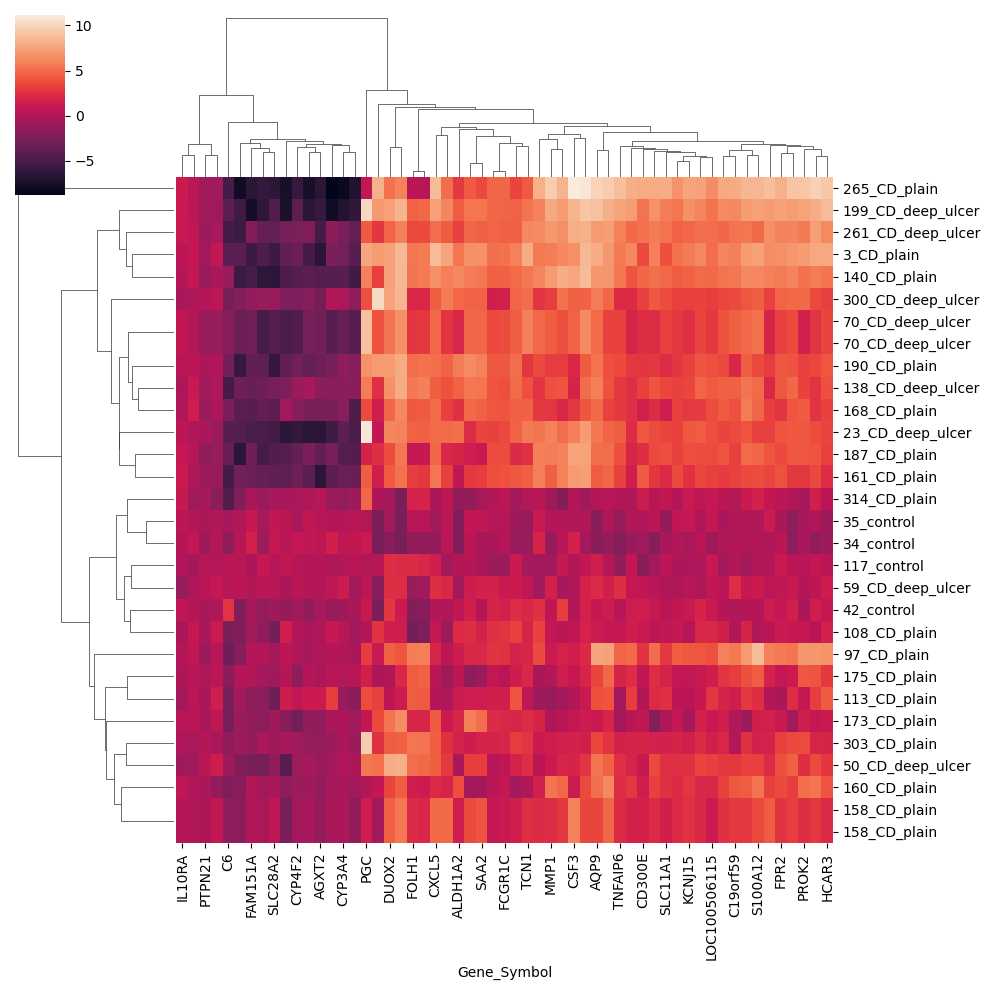

In [64]:
# sns.clustermap(top_genes_df.iloc[:,np.r_[143:168, 221:228]].T)
sns.clustermap(top_genes_df.iloc[:,np.r_[rand_pids]].T)